### <center> Segundo Miniteste de Métodos Computacionais em Física Médica </center> 
>24 de maio de 2021
>>Maria Gama -
>> 202003315

***

Como dito anteriormente, os métodos de simulação estocástica são baseados na habilidade de geração e números aleatórios que representam uma variável aleatória distribuída uniformemente em [0,1]. Na prática, não é possível gerar de forma realmente aleatória valores de uma distribuição uniforme, entretanto, é possível gerar, de forma determinística, uma sequência de valores que parecem ser aleatórios e uniformemente distribuídos no intervalo [0,1]. Neste sentido, geramos o que são conhecidos por números pseudo-aleatórios.

Um Método de Monte Carlo são métodos que consistem na implementação de algoritmos que usam sequencias de numeros aleatorios para a resolução numérica de problemas.

número aleatório entre a e b 
- a+(b-a)*random()


$$ FOM= \frac{N}{\sigma^2\times T} $$
valor de mérito - quanto maior melhor para a computação

## método da rejeição 
<p> Vamos amostrar uma função exponencial $f(x)=e^{-x}$ a partir de uma distribuição uniforme $g(x)=c\cdot x$ </p>

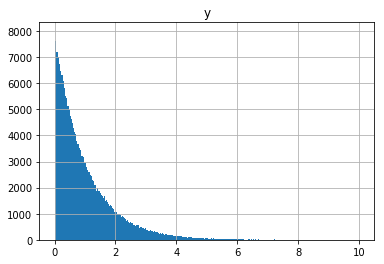

In [3]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy.stats import norm
amostra=[]
amostra2=[]
x=[]
n=8000000
j=0
for i in range(1,n):
    x1=10*random()
    f=math.exp(-x1)
    y=1*random()  #quando se aumenta a constante o metodo perde eficiencia porque usa muitos pontos que não usa
    if y <= f:
        j+=1
        amostra.append(x1)
        x.append(j)
#plt.plot(x,amostra,'-o')
dados={'y':amostra}
bins=np.arange(0,10,.01)
df=pd.DataFrame(data=dados).hist(bins=bins)  

Para uma gaussiana

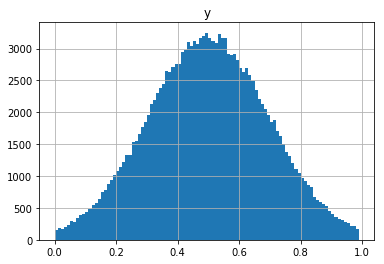

In [35]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy.stats import norm
amostra=[]
amostra2=[]
x=[]
n=800000
j=0
for i in range(1,n):
    x1=random()
    y=5*random()
    u=norm.pdf(x1,0.5,0.2)
    if y<=u:
        amostra.append(x1)
dados={'y':amostra}
bins=np.arange(0,1,.01)
df=pd.DataFrame(data=dados).hist(bins=bins) 

## inverso da cumulativa
primeiro temos de ver se está normalizada. se estiver calculamos a cumulativa (ter atenção aos limites do integral). depois fazemos o inverso igualando a expressão a U e fazendo em ordem a X

exponencial $$ p(x)= 3e^{-3x} $$ <p> Vamos fazer o plot da funçãon e depois o plot da função com o inverso da cumulativa e vemos que dá a mesma coisa </p>

In [32]:
import numpy as np
import matplotlib.pyplot as plt 
x = np.arange(0,3,0.01)
p=3*np.exp(-3*x)
len(x)

300

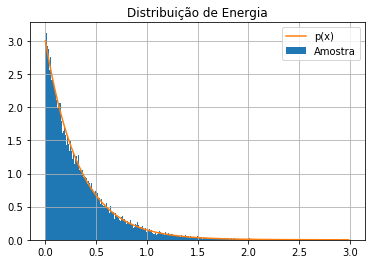

In [7]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy import special
x = np.arange(0,3,0.01)
p=3*np.exp(-3*x)
#plt.plot(x,p)
amostra=[]
#x=[]
n=100000
for i in range(1,n):
    u=random()
    y=-np.log(u)/3
    #x.append(i)
    amostra.append(y)
# plt.plot(x,amostra,'-o')
#dados={'y':amostra}
#bins=np.arange(0,3,.01)
#df=pd.DataFrame(data=dados).hist(bins=bins)

plt.hist(amostra,density=True,bins=1000,label="Amostra",range=(0,3))
plt.plot(x,p,label="p(x)")
plt.title("Distribuição de Energia")
plt.legend()
plt.grid()

gaussiana. <p>  A função inversa é $F^{-1}(X)=\mu+\sigma\sqrt{2}\textrm{erf}^{-1}(2X-1)$</p>

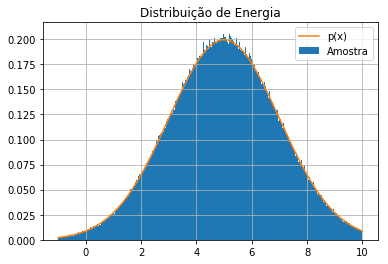

In [40]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy import special
from scipy.stats import norm
x = np.arange(-1,10,0.01)
p=norm.pdf(x,5,2)
amostra=[]
#x=[]
n=1000000
mu=5
sigma=2
for i in range(1,n):
    r=random()
    y=mu+sigma*math.sqrt(2)*special.erfinv(2*r-1)
    #x.append(i)
    amostra.append(y)
# plt.plot(x,amostra,'-o')
#dados={'y':amostra}
#bins=np.arange(-1,15,.01)
#df=pd.DataFrame(data=dados).hist(bins=bins)

plt.hist(amostra,density=True,bins=500,label="Amostra",range=(-1,10))
plt.plot(x,p,label="p(x)")
plt.title("Distribuição de Energia")
plt.legend()
plt.grid()

## Método de Box-Muller

Considerando duas distribuições gaussianas:

$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{\mu-x}{\sigma})^2}$ e 
$p(y)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{\mu-y}{\sigma})^2}$

Considerando o caso $\mu=0$ e $\sigma=1$, a probabilidade conjunta das duas será:
$p(x,y)=\frac{1}{2\pi}e^{-\frac{1}{2}(x^2+y^2)}$,

Se $x^2+y^2\leq 1$ e $x^2+y^2\neq 0$   o problema tem coordenadas polares, em que $x=rcos\theta$ e $y=rsen\theta$

Reescrevendo:

$p(r)=\frac{1}{2\pi}e^{-\frac{1}{2}r^2}$,

Podemos ainda integrar para obter a função cumulativa:

$\displaystyle\int_0^r\int_0^{\theta} \frac{1}{2\pi}e^{-\frac{1}{2}r^2}rdrd\theta=\frac{\theta}{2\pi}\displaystyle\int_0^re^{-\frac{1}{2}r^2}rdr$

Então utilizando o método da distribuição acumulada inversa, uma das variáveis será:

$F^{-1}(\theta)=U_1=\frac{\theta}{2\pi}$ ou seja, $2\pi U_1=\theta$

Restando-nos apenas o segundo termo:

$\displaystyle\int_0^re^{-\frac{1}{2}r^2}rdr$

Em que podemos ainda fazer a mudança de variável $t=\frac{1}{2}r^2$ o que implica que $dt=rdr$, e teremos:

$\displaystyle\int_0^\sqrt{t} e^{-t}dt$

Que é na verdade a função exponencial, que vimos na aula passada como se amostrava pelo método da cumulativa inversa:

$t=-ln(U_2)$, ou seja, $r=\sqrt{-2ln(U_2)}$,

Sendo assim, o nosso x e y, que serão variáveis aleatórias de distribuição gaussiana, podem ser reescritos:

(1)$X=rcos(\theta)= cos(2\pi U_1)\sqrt{-2ln(U_2)}$

(2)$Y=rsen(\theta)= sen(2\pi U_1)\sqrt{-2ln(U_2)}$

As equações de cima definem o método de Box-Muller para amostrar a partir de duas distribuições gaussianas.

<b>Método polar de Marsaglia</b>

O método polar de Marsaglia permite simplificar estas equações, retirando a componente trigonométrica, considerando que:

$s=r^2=x^2+y^2=u^2+v^2$

Em que $u$ e $v$ são dois novos números aleatórios uniformemente distribuídos entre $[-1,1]$.

Podemos  reescrever assim as equações trigonométricas:

$cos\theta=\frac{u}{r}=\frac{u}{\sqrt{s}}$

$sen\theta=\frac{v}{r}=\frac{v}{\sqrt{s}}$

Identificando $\frac{\theta}{2\pi}=U_1$ e $s=U_2$, as equações (1) e (2) ficam:

(3)$X=\sqrt{-2ln(s)}\frac{u}{\sqrt{s}}=u\sqrt{\frac{-2ln(s)}{s}}$

(4)$Y=\sqrt{-2ln(s)}\frac{v}{\sqrt{s}}=v\sqrt{\frac{-2ln(s)}{s}}$


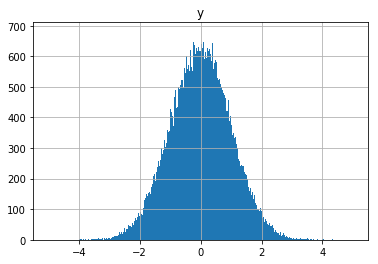

In [43]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
amostra1=[]
amostra2=[]
x=[]
n=200000
for i in range(0,n):
    r1=-1+2*random()
    r2=-1+2*random()
    s=r1**2+r2**2
    if s!=0 and s<=1:
        s1=-2*math.log(s)/s
        z1=r1*s1**0.5
        z2=r2*s1**0.5
        amostra1.append(z1)
        amostra2.append(z2)
        x.append(i)
#plt.plot(x,amostra1,'-o')
dados={'y':amostra1}
bins=np.arange(-5,5,.01)
df=pd.DataFrame(data=dados).hist(bins=bins) 

## Cálculo de PI - Folha 5 - Exercício 2

A área do quadrado é de $A_q=L^2$, enquanto que a área do círculo é de $A_c=\pi r^2=\pi \frac{L^2}{4}$.
A razão da área do círculo para a área do quadrado será simplesmente de $ \frac{A_c}{A_q} =\frac{\pi}{4}$. 
Uma forma de calcular o valor de $\pi$ é simplesmente fazer "tiro ao alvo". Ou seja, consideramos um círculo de r=1. Definimos dois números aleatórios $-1\leq x\leq 1$ e $-1 \leq y\leq 1$.
Se:
- $x^2+y^2\leq 1$, significa que o número se encontra dentro da área do círculo, então aceitamos (area=area+1);
- $x^2+y^2>1$, significa que o número se encontra fora da área do círculo, <i>mas</i> dentro da área do quadrado, então não aceitamos.

Se iterarmos $N$ vezes, com $N$ suficientemente grande, a soma de todos os números que aceitarmos, vai corresponder à estimativa da razão da área do círculo sobre a área do quadrado, que como já tínhamos visto, vale $\frac{\pi}{4}$. Então, multiplicando por 4, obtemos uma estimativa para o número $\pi$. 

- $\pi \approx \frac{4}{N}\times area$

valor de pi= 3.141592653589793
resultado= 3.1318263652730547
desvio= 0.0031087061225390927


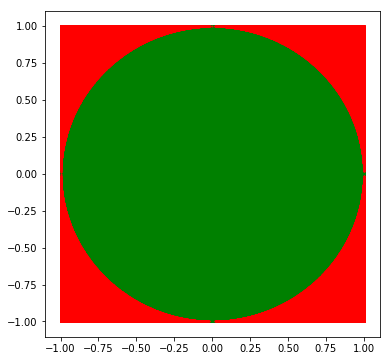

In [45]:
%matplotlib inline
from random import seed
from random import random
import os
import math
from math import pi
from math import sqrt
import matplotlib.pyplot as plt 
import numpy as np 
#figure, chart = plt.subplots(1, 1, figsize = (12,6))
# integrar usando números aleatorios x e y de 0 a 1
seed(1)
x1=[0]
y1=[0]
x2=[]
y2=[]
x3=[]
y3=[]
res=[math.pi]
for N in range (1,5000,1):
    area=0
    pi2=0
    for i in range(N):
        x=-1+2*random()
        y=-1+2*random()
        a=math.pi
        r=x**2+y**2
        if r<=1:
            area = area + 1
            x2.append(x)
            y2.append(y)
        else:
            x3.append(x)
            y3.append(y)
    pi2=4/N*area
    dev=abs((pi2-pi)/pi)
    # print(dev)
    x1.append(N)
    y1.append(pi2)
    res.append(a)
plt.figure(figsize=(6,6))
plt.scatter(x2, y2, color = 'g',s=1)
plt.scatter(x3, y3, color = 'r',s=1)
print('valor de pi=',math.pi)
print('resultado=',pi2)
print('desvio=',dev)
	

In [6]:
%matplotlib inline
from random import seed
from random import random
import os
import math
from math import pi
from math import sqrt
import matplotlib.pyplot as plt 
import numpy as np 
#figure, chart = plt.subplots(1, 1, figsize = (12,6))
# integrar usando números aleatorios x e y de 0 a 1
seed(1)
x1=[0]
y1=[0]
x2=[]
y2=[]
x3=[]
y3=[]
res=[math.pi]
for N in range (1,5000,1):
    area=0
    pi2=0
    for i in range(N):
        x=-1+2*random()
        y=-1+2*random()
        a=math.pi
        r=x**2+y**2
        if r<=1:
            area = area + 1
    pi2=4/N*area
    dev=abs((pi2-pi)/pi)
    # print(dev)
 #   x1.append(N)
#    y1.append(pi2)
#    res.append(a)
#plt.figure(figsize=(6,6))
#plt.scatter(x2, y2, color = 'g',s=1)
#plt.scatter(x3, y3, color = 'r',s=1)
#print('area do quadrado=',math.pi)
print('area do circulo=',pi2)
	

area do circulo= 3.1318263652730547


## Folha 5 - Exercício 5

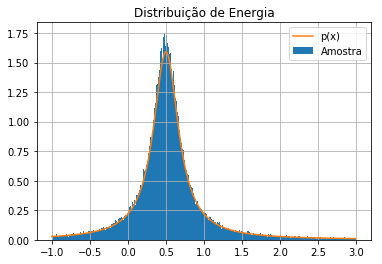

In [26]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy import special
x = np.arange(-1,3,0.01)
n=100000
mu=0.5
gama=0.2
amostra=[]
a=[]
b=((x-mu)/gama)**2

px=(1/(gama*math.pi))*(1/(b+1)) 

for i in range(1,n):
    u=random()
    y=mu+gama*math.tan(math.pi*(u-0.5))
    a.append(i)
    amostra.append(y)
# plt.plot(x,amostra,'-o')
dados={'y':amostra}
#bins=np.arange(-1,3,.01)
#df=pd.DataFrame(data=dados).hist(bins=bins)
plt.hist(amostra,density=True,bins=500,label="Amostra",range=(-1,3))
plt.plot(x,px,label="p(x)")
plt.title("Distribuição de Energia")
plt.legend()
plt.grid()

## Folha 6 -Exercício 2

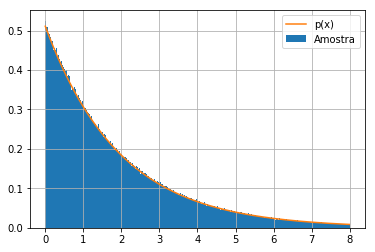

In [2]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy import special
x=[]
E=[]
la=0.511
n=1000000
x = np.arange(0,8,0.01)
p=la*np.exp(-la*x)
p_cumul=1-np.exp(-la*x)
#plt.plot(x,p)
#plt.title("Distribuição de Energia")
#plt.grid()
for i in range(1,n):
    u=random()
    y=-np.log(u)/la
    E.append(y)
dados={'Distribuição de Energia':E}  #obtemos o mesmo mas com o metodo do inverso da cumulativa
#bins=np.arange(0,8,.01)
#df=pd.DataFrame(data=dados).hist(bins=bins)
plt.hist(E,density=True,bins=500,label="Amostra",range=(0,8))
plt.plot(x,p,label="p(x)")
#plt.title("Distribuição de Energia")
plt.legend()
plt.grid()

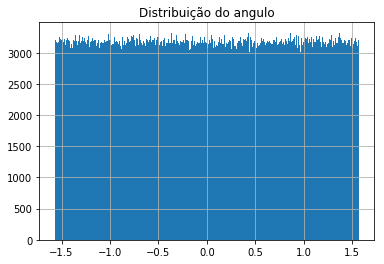

In [39]:
#fazendo a amostragem para o angulo

%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy import special

x=[]
t=[]
la=0.511
n=1000000
x = np.arange(-math.pi/2,math.pi/2,0.01)

for i in range(1,n):
    u=-math.pi/2+math.pi*random()
    t.append(u)
dados={'Distribuição do angulo':t}
bins=np.arange(-math.pi/2,math.pi/2,.01)
df=pd.DataFrame(data=dados).hist(bins=bins)

Média =  0.7198
variancia =  0.06143
Desvio  =  0.24786
O erro padrão é 0.0008%


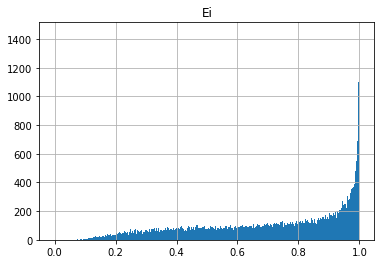

In [40]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy import special
x=[]
dE=[]
la=0.511
n=100000
for i in range(n):
    u=random()
    t=-math.pi/2+math.pi*random()
    E=-np.log(u)/la
    Ei=1/(1+E*(1-math.cos(t)))
    dE.append(Ei)
dE_sqrt=[]
for k in range(n):
    dE_sqrt.append(dE[k]**2)
media=sum(dE)/n
variancia=sum(dE_sqrt)/n-media**2
dp=variancia**0.5
erro_padrao=dp/(n**0.5)
    

# plt.plot(x,amostra,'-o')
dados={'Ei':dE}
bins=np.arange(0,1,0.001)
df=pd.DataFrame(data=dados).hist(bins=bins)

print('Média = ', round(media,5))
print('variancia = ', round(variancia,5))
print('Desvio  = ',round(dp,5))
print("O erro padrão é %.4f" %erro_padrao +"%")
#estes valores são para cada uma das partículas

## Integrais de Monte Carlo

$$ variancia= \langle I^2 \rangle - \langle I \rangle ^2 $$

In [29]:
%matplotlib inline
from random import seed
from random import random
import os
import math
from math import pi
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


N=100000
valores = []
real=-(1/101**2)+1

for i in range (1,N,1):
    u=10*random()
    valores.append(4*u/(u**2+1)**3)
valores2=valores*10
resultado=sum(valores2)/N
print("O valor real é %f" %real)
print("O valor calculado é %f" %resultado)

valores1=[]
for k in range(len(valores)):
    valores1.append(valores[k]**2)
    
media=sum(valores)/N*10
variancia=abs(sum(valores1)/N*10- media**2)
dp=variancia**0.5
erro_padrao=dp/(n**0.5)
erro_relativo=abs((resultado-real)/real*100)

print("A média é %f" %media)
print("A variância é %f" %variancia)
print("O desvio padrão é %f" %dp)
print("O erro padrão é %f" %erro_padrao)
print("O erro relativo é %f" %erro_relativo)

O valor real é 0.999902
O valor calculado é 0.999141
A média é é 0.999141
A variância é 0.312493
O desvio padrão é 0.559011
O erro padrão é 0.001768
O erro relativo é 0.076065


Integral  $$\int_{0}^{5} \frac{x+1}{x+5} dx$$  $$\langle E \rangle$$

In [7]:
%matplotlib inline
from random import seed
from random import random
import os
import math
from math import pi
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
real = -4*(np.log(10)-np.log(5))+5
N=1000000
valores = []
for i in range (1,N,1):
    u=5*random()
    valores.append((u+1)/(u+5))
valores2=valores*5
resultado=sum(valores2)/N

print("O valor real é %f" %real)
print("O valor calculado é %f" %resultado)

valores1=[]
for k in range(len(valores)):
    valores1.append(valores[k]**2)
    
media=sum(valores)/N*5
variancia=abs(sum(valores1)/N*5- media**2)
dp=variancia**0.5
erro_padrao=dp/(n**0.5)
erro_relativo=abs((resultado-real)/real*100)

print("A média é %f" %media)
print("A variância é %f" %variancia)
print("O desvio padrão é %f" %dp)
print("O erro padrão é %f" %erro_padrao)
print("O erro relativo é %f" %erro_relativo+"%")

O valor real é 2.227411
O valor calculado é 2.227699
A média é 2.227699
A variância é 3.907641
O desvio padrão é 1.976775
O erro padrão é 0.001977
O erro relativo é 0.012910%


 Integral de monte carlo $$ I \sim \lim_{x\to\infty} \frac{1}{N} \sum_{i=1}^{N} f(\xi_i)(b-a)$$

In [14]:
%matplotlib inline
from random import seed
from random import random
import os
import math
from math import pi
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#os.system('clear')
# integrar usando números aleatorios x^2 de 0 a 4

N=10000000
valores = []
real=625/4-5

for i in range (1,N,1):
    u=5*random()
    valores.append(u**3-1)
valores2=valores*5
resultado=sum(valores2)/N
erro=abs(real-resultado)/real*100
desvio=abs(real-resultado)
print('Integral = ', round(resultado,5))
print('Real = ', round(real,5))
#print('Erro  = ',round(erro,5) + '%')
print('Desvio  = ',round(desvio,5))
print("O erro é %.4f" %erro +"%")

Integral =  151.29038
Real =  151.25
Desvio  =  0.04038
O erro é 0.0267%


## Folha 5 -Exercício 3

Área real do triângulo é  18.25125
Área estimada do triângulo é  18.2111


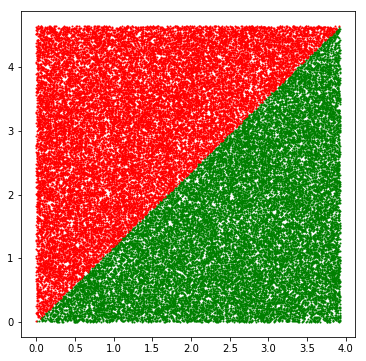

In [57]:
#exercicio com o triangulo no meio do quadrado

from random import seed
from random import random   #para poder calcular os números aleatórios 
import os
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

a= 5.65
b= 7.85
c= 1
x2=[]
y2=[]
x3=[]
y3=[]

x=b/2
y=a-c
teta_c=np.arctan(y/x)
area_ret=a*b
area_tri = x*y/2 #area do triangulo pequeno
area_tot = x*y #area do triangulo

Ntotal= 50000 #numero de propostas
good= 0 #prpostas aceites
for _ in range(Ntotal):
    rand_x = x*random()
    rand_y = y*random()
    theta  = np.arctan(rand_y/rand_x)
    if theta < teta_c:
        good = good + 1
        x2.append(rand_x)   
        y2.append(rand_y)   
    else:
        x3.append(rand_x)
        y3.append(rand_y)          
        
plt.figure(figsize=(6,6))
plt.scatter(x2, y2, color = 'g',s=1)
plt.scatter(x3, y3, color = 'r',s=1)
frac = good/Ntotal
calculada=area_tot*frac #area do triangulo mais pequeno
triangulo=calculada*2
print("Área real do triângulo é " ,round(area_tot,5))
print("Área estimada do triângulo é " ,round(triangulo,5))

Área real do triângulo é  11.9985
Área estimada do triângulo é  11.98953


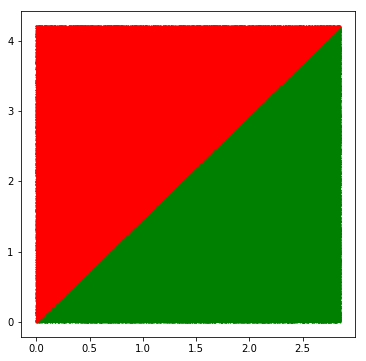

In [6]:
#exercicio com o triangulo grande
from random import seed
from random import random   #para poder calcular os números aleatórios 
import os
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

a= 4.21
b= 5.7
c= 1
x2=[]
y2=[]
x3=[]
y3=[]

x=b/2
y=a
teta_c=np.arctan(y/x)
area_ret=a*b
area_tri = x*y/2 #area do triangulo pequeno
area_tot = x*y #area do triangulo

Ntotal= 500000 #numero de propostas
good= 0 #prpostas aceites
for _ in range(Ntotal):
    rand_x = x*random()
    rand_y = y*random()
    theta  = np.arctan(rand_y/rand_x)
    if theta < teta_c:
        good = good + 1
        x2.append(rand_x)   
        y2.append(rand_y)   
    else:
        x3.append(rand_x)
        y3.append(rand_y)          
        
plt.figure(figsize=(6,6))
plt.scatter(x2, y2, color = 'g',s=1)
plt.scatter(x3, y3, color = 'r',s=1)
frac = good/Ntotal
calculada=area_tot*frac #area do triangulo mais pequeno
triangulo=calculada*2
print("Área real do triângulo é " ,round(area_tot,5))
print("Área estimada do triângulo é " ,round(triangulo,5))

In [29]:
import numpy as np

a = 0
b = 10
n = 1000
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap
I_trap

1.8390561727575034

In [27]:

import math
N=10000000
valores = []
a=float(math.pi)

for i in range (1,N):
    u=10*random()
    valores.append(math.sin(u))
valores2=valores*10
resultado=sum(valores2)/N
resultado

1.8396484925309782

## Movimento Browniano

C:\Users\Utilizador\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


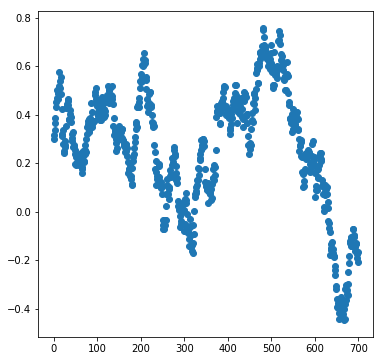

In [1]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
amostra1=[]
amostra2=[]
x0=0.3
x=[0]
y=[x0]
k=1000
for i in range(0,k):
    r1=-1+2*random()
    r2=-1+2*random()
    s=r1**2+r2**2
    if s!=0 and s<=1:
        s1=-2*math.log(s)/s
        z1=r1*s1**0.5
        amostra1.append(z1)
N=700
T=1
dt=T/(N-1)
for i in range(1,N):
    x0=x0+np.sqrt(dt)*amostra1[i]
    x.append(i)
    y.append(x0)
ax.scatter(x,y)

C:\Users\Utilizador\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


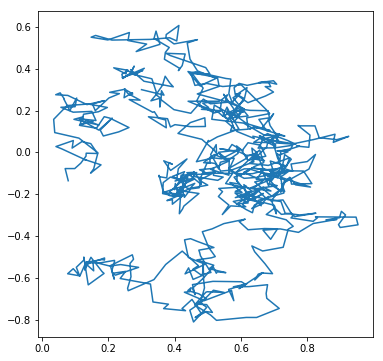

In [2]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
amostra1=[]
amostra2=[]
x0=0.3
y0=0.3
x=[x0]
y=[x0]
k=1500
for i in range(0,k):
    r1=-1+2*random()
    r2=-1+2*random()
    s=r1**2+r2**2
    if s!=0 and s<=1:
        s1=-2*math.log(s)/s
        z1=r1*s1**0.5
        z2=r2*s1**0.5
        amostra1.append(z1)
        amostra2.append(z2)
N=800
T=1
dt=T/(N-1)
for i in range(1,N):
    x0=x0+np.sqrt(dt)*amostra1[i]
    y0=y0+np.sqrt(dt)*amostra2[i]
    x.append(x0)
    y.append(y0)
ax.plot(x,y)

<b>Gerador de números aleatórios</b>

Vamos construir o nosso gerador de números aleatórios a partir de:

$X_{n+1}=(aX_n+c)\mod m$

Utilizando os valores:
$m=2^{31}-1,a=16807,X_0=2^{19}-1$

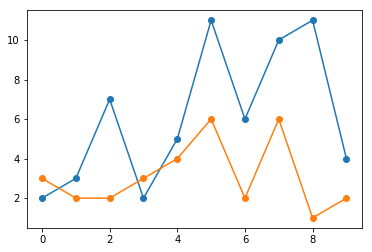

In [3]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
m=2**31-1 #modulo
a=16807 #multiplicador
c=0 #incremento
s=2**19-1 #valor inicial ou semente (é o Xo)
rand=[int(10*s/(2**31-1)+2)]
x=[0]
n=10
y=[3,2,2,3,4,6,2,6,1,2]
for i in range (1,n):
    s = (a*s+c)%m
    rand.append(int(10*s/(2**31-1)+2))  #numero aleatorio entre 2 e 10
    x.append(i)
plt.plot(x,rand,'-o')
plt.plot(x,y,'-o')

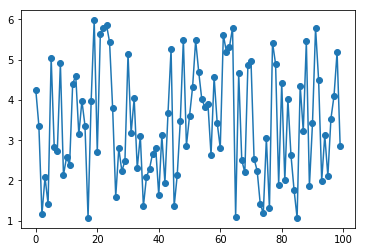

In [4]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
rand=[]
x=[]
n=100
for i in range(0,n):
    s=1+5*random() #numeros aleatorios entre 1 e 6
    rand.append(s) 
    x.append(i)
plt.plot(x,rand,'-o')